In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler


In [15]:
df = pd.read_csv("/Users/prathamesh/Downloads/uber.csv")
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [4]:
# Remove unnecessary columns
df = df.drop(columns=['Unnamed: 0', 'key'])

# Handle missing values (if any)
df.dropna(inplace=True)

In [5]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], errors='coerce')
df['year'] = df['pickup_datetime'].dt.year
df['month'] = df['pickup_datetime'].dt.month
df['day'] = df['pickup_datetime'].dt.day
df['hour'] = df['pickup_datetime'].dt.hour
df['minute'] = df['pickup_datetime'].dt.minute


In [6]:
df.drop('pickup_datetime', axis=1, inplace=True)

In [7]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

In [8]:
df = remove_outliers(df, 'fare_amount')
df = remove_outliers(df, 'passenger_count')


In [9]:
correlation_matrix = df.corr()
print(correlation_matrix)

                   fare_amount  pickup_longitude  pickup_latitude  \
fare_amount           1.000000          0.000587         0.002538   
pickup_longitude      0.000587          1.000000        -0.806279   
pickup_latitude       0.002538         -0.806279         1.000000   
dropoff_longitude    -0.002474          0.834489        -0.754064   
dropoff_latitude      0.000262         -0.861589         0.666790   
passenger_count       0.015885         -0.001130         0.000375   
year                  0.135363          0.011603        -0.010723   
month                 0.024739         -0.003148         0.003446   
day                   0.007827          0.003789        -0.006668   
hour                 -0.013628          0.004054        -0.005194   
minute               -0.008683          0.002374        -0.002736   

                   dropoff_longitude  dropoff_latitude  passenger_count  \
fare_amount                -0.002474          0.000262         0.015885   
pickup_longitude     

<AxesSubplot:>

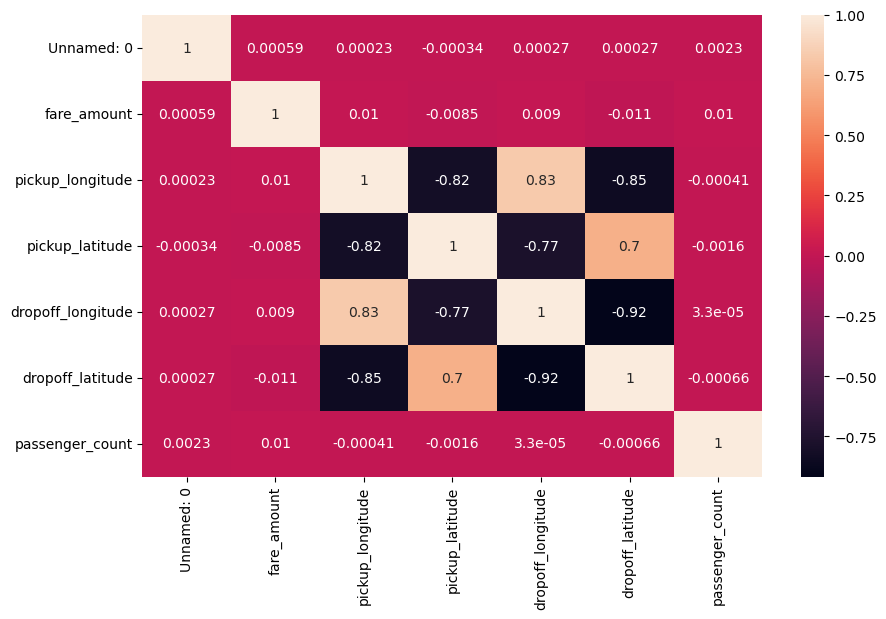

In [18]:
#optional

import matplotlib.pyplot as plt
import seaborn as sns
fig,axis= plt.subplots(figsize= (10,6))
sns.heatmap(df.corr(),annot= True)

In [10]:
# 4. Implement Regression Models
X = df.drop('fare_amount', axis=1)
y = df['fare_amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [12]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),  # Adjust alpha if needed
    'Lasso Regression': Lasso(alpha=1.0)   # Adjust alpha if needed
}

In [13]:
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results[name] = {'R2': r2, 'RMSE': rmse}


In [14]:
# 5. Evaluate and Compare
for name, metrics in results.items():
    print(f'{name}:')
    print(f'  R2: {metrics["R2"]:.4f}')
    print(f'  RMSE: {metrics["RMSE"]:.4f}')


Linear Regression:
  R2: 0.0193
  RMSE: 4.0995
Ridge Regression:
  R2: 0.0193
  RMSE: 4.0995
Lasso Regression:
  R2: -0.0001
  RMSE: 4.1398
